In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic

In [2]:
import vice

from surp import subgiants
from surp import gce_math as gcem
from surp.gce_math import MH_to_Z, Z_to_MH, Z_SUN
import surp

import arya

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
arya.style.set_size((4, 2*np.sqrt(2)))

In [4]:
surp.set_yields()

In [5]:
# all_abundances = pd.read_csv("data_analysis/all_data.csv")
# stars = pd.read_csv("../data/amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63], engine="python")
# stars["C_MG"] =  stars["[C/H]3N"] - stars["[O/H]3N"]
# stars["MG_H"] =  stars["[O/H]3N"]
# stars["C_MG_ERR"] = stars["e_[C/H]3N"] + stars["e_[O/H]3N"]

# df_stars = stars[["C_MG", "MG_H", "C_MG_ERR"]]

# all_abundances["C_MG"] = all_abundances["[c/o]"]
# all_abundances["MG_H"] = all_abundances["[o/h]"]
# all_abundances["C_MG_ERR"] = all_abundances["[c/o]_err"]

# stars_all = all_abundances[["C_MG", "MG_H", "C_MG_ERR"]][(~np.isnan(all_abundances.C_MG)) & (all_abundances.type == "star")]
# RL_all = all_abundances[["C_MG", "MG_H", "C_MG_ERR"]][(~np.isnan(all_abundances.C_MG)) & (all_abundances.type == "RL")]
# DLA_all = all_abundances[["C_MG", "MG_H", "C_MG_ERR"]][(~np.isnan(all_abundances.C_MG)) & (all_abundances.type == "DLA")]
# dwarf_all = all_abundances[["C_MG", "MG_H", "C_MG_ERR"]][(~np.isnan(all_abundances.C_MG)) & (all_abundances.type == "dwarf")]

In [6]:
# stars_x_obs = stars.MG_H
# stars_y_obs = stars.C_MG
# all_x_obs = all_abundances.MG_H
# all_y_obs = all_abundances.C_MG

In [7]:

filt = ~subgiants.high_alpha.values
df = subgiants[filt]

bins = np.quantile(df.MG_H, np.linspace(0, 1, 20))

counts = binned_statistic(df.MG_H, df.C_MG, bins=bins, statistic='count')[0]

ym = binned_statistic(df.MG_H, df.C_MG, bins=bins, statistic='median')[0]
yl = binned_statistic(df.MG_H, df.C_MG, bins=bins, statistic=lambda x: np.percentile(x, 16))[0]
yh = binned_statistic(df.MG_H, df.C_MG, bins=bins, statistic=lambda x: np.percentile(x, 84))[0]
ym_err = binned_statistic(df.MG_H, df.C_MG_ERR, bins=bins, statistic='mean')[0]


xm = binned_statistic(df.MG_H, df.MG_H, bins=bins, statistic='median')[0]
xl = binned_statistic(df.MG_H, df.MG_H, bins=bins, statistic=lambda x: np.percentile(x, 16))[0]
xh = binned_statistic(df.MG_H, df.MG_H, bins=bins, statistic=lambda x: np.percentile(x, 84))[0]
xm_err = binned_statistic(df.MG_H, df.MG_H_ERR, bins=bins, statistic='mean')[0]

In [8]:
yym = gcem.brak_to_abund_ratio(ym, "c", "mg")
yyl = gcem.brak_to_abund_ratio(yl - ym_err, "c", "mg")
yyh = gcem.brak_to_abund_ratio(yh + ym_err, "c", "mg")
yym_err = (yyh - yyl) / 2 / np.sqrt(counts)

x_err = (xh - xl)/ 2 / np.sqrt(counts)

In [9]:
obs = (xm, yym, x_err, yym_err)

In [10]:
def plot_obs():
    plt.errorbar(xm, yym, yerr=yym_err, xerr=x_err,  fmt=".", capsize=0)

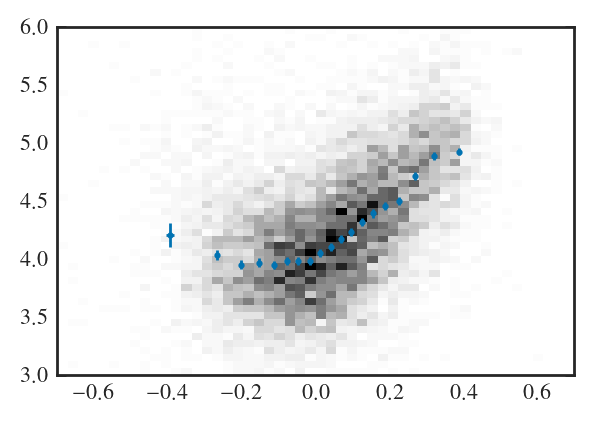

In [11]:
plt.hist2d(df.MG_H, gcem.brak_to_abund_ratio(df.C_MG, "c", "mg"), 50, range=([-0.7, 0.7], [3, 6]), cmap="Greys")
plot_obs()


In [12]:
params = surp.YieldParams.from_file("../../models/fruity/f_0/yield_params.toml")
surp.set_yields(params)
y_c_lin = vice.yields.ccsne.settings["c"]

surp.set_yields(surp.YieldParams.from_file("../../models/fiducial/yield_params.toml"))
y_c_quad = vice.yields.ccsne.settings["c"]

In [13]:
params

YieldParams(yield_scale=1.0, mlr='larson1974', y_c_cc='Quadratic', y0_c_cc=0.002753396, zeta_c_cc=0.00227, kwargs_c_cc={'A': 0.00258}, Y_c_agb='cristallo11', alpha_c_agb=0.0, kwargs_c_agb={}, y_c_ia=0.0, y0_n_cc=0.0005, zeta_n_cc=0.0, Y_n_agb='A', kwargs_n_agb={}, eta_n_agb=0.000502, y0_n_agb=0.0, y_fe_cc=0.000473, y_fe_ia=0.00077)

In [14]:
ymg = vice.yields.ccsne.settings["mg"]

In [15]:
alpha = params.alpha_c_agb

In [16]:
y_c_lin = np.vectorize(y_c_lin)
y_c_quad = np.vectorize(y_c_quad)
def y_c_agb(Z):
    return y_agb_0 + zeta_agb * gcem.Z_to_MH(Z)

/tmp/ipykernel_173873/3210025054.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


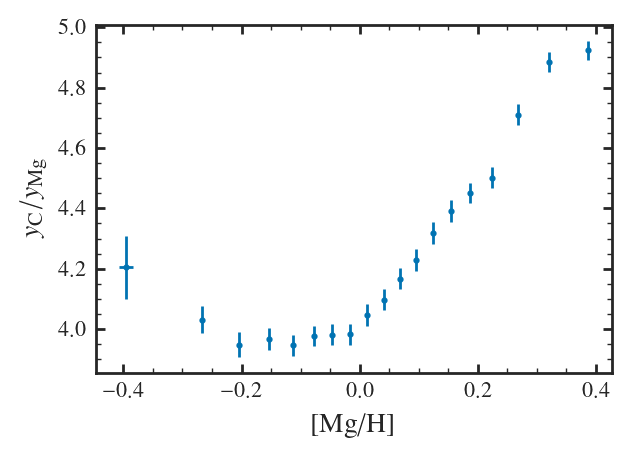

In [17]:
plot_obs()
x = np.linspace(-0.45, 0.45, 1000)
Z = gcem.MH_to_Z(x)
# plt.plot(x, (y_c_lin(Z) + y_c_agb(Z)) / ymg, label="linear fit")
# plt.plot(x,(y_c_quad(Z) + y_c_agb(Z))/ymg, ls="--", label="quadratic fit")

plt.legend()
plt.xlabel("[Mg/H]")
plt.ylabel(r"$y_{\rm C} / y_{\rm Mg}$")
plt.savefig("figures/equilibrium_yield.pdf")

## minus agb

In [18]:
alpha = 2.4

vice.yields.agb.settings["c"] = alpha*surp.agb_interpolator.interpolator("c")

In [19]:
y_agb = surp.yields.calc_y(gcem.MH_to_Z(xm), kind="agb")

In [20]:
y_cc = yym - y_agb/ymg

<ErrorbarContainer object of 3 artists>

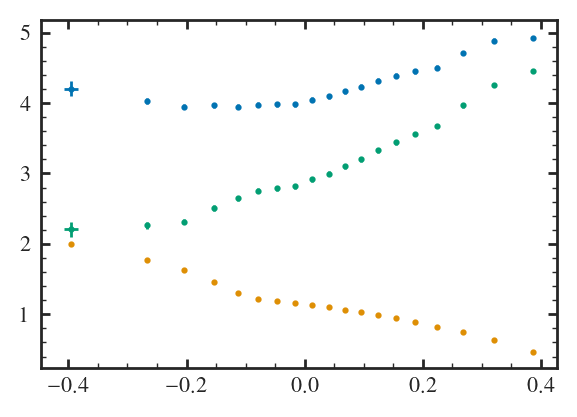

In [21]:
plt.errorbar(xm, yym, yerr=yym_err, xerr=x_err,  fmt=".", capsize=0)
plt.errorbar(xm, y_agb/ymg, fmt=".", capsize=0)

plt.errorbar(xm, y_cc, yerr=yym_err, xerr=x_err,  fmt=".", capsize=0)


In [61]:
def lin(x, a, b):
    return a*x + b

def quad(x, a, b, c):
    return a*x**2 + b*x + c

def sqrt(x, a, b):
    return a*x**0.5 + b

In [50]:
def fit_line(x, y, yerr, lin=lin):
    popt, covt  = curve_fit(lin, x, y, sigma=yerr)

    x_pred = np.linspace(x[0], x[-1], 100)
    y_pred = lin(x_pred, *popt)
    plt.plot(x_pred, y_pred)

    print(popt, np.sqrt(np.diag(covt)))

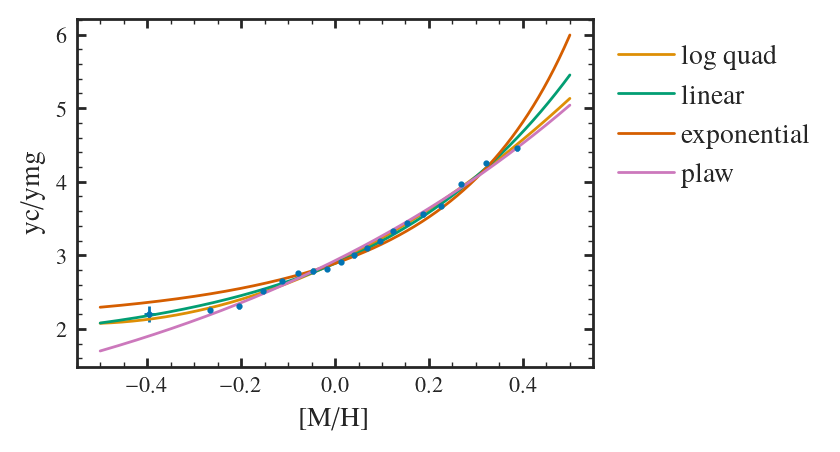

In [60]:
plt.errorbar(xm, y_cc, yerr=yym_err, xerr=x_err, fmt=".", capsize=0)
plt.xlabel("[M/H]")
plt.ylabel("yc/ymg")

x = np.linspace(-0.5, 0.5, 1000)
Z = gcem.MH_to_Z(x)
#plt.plot(x, 3.43722*x + 2.9769, label="log ")
plt.plot(x, 2.8146343*x**2 +  3.05580838*x + 2.90024603, label="log quad")
plt.plot(x, 67.28349691*Z +  1.70554884, label="linear")

scale =  gcem.brak_to_abund_ratio(0, "c", "mg")
plt.plot(x, 10**(8.32414276*Z + -0.38910772) * scale, label="exponential")

plt.plot(x, (Z/surp.Z_SUN)**(0.47199475) * 10**-0.23699064 * scale, label="plaw")


arya.Legend(-1)

[3.43722132 2.97697766] [0.15058366 0.02889774]
[2.8146343  3.05580838 2.90024603] [0.30560991 0.07442084 0.01449892]


Text(0, 0.5, 'yc/ymg')

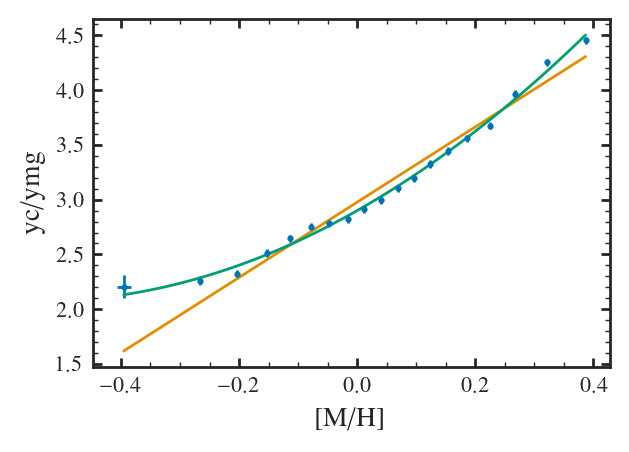

In [63]:
plt.errorbar((xm), y_cc, yerr=yym_err, xerr=x_err,  fmt=".", capsize=0)
fit_line(xm, y_cc, yym_err)
fit_line(xm, y_cc, yym_err, lin=quad)
plt.xlabel("[M/H]")
plt.ylabel("yc/ymg")


In [25]:
0.001 / surp.Z_SUN / np.log(10)

np.float64(0.02467582283541203)

In [26]:
surp.yield_models.Lin_CC(y0=0.001/np.log(10), zeta=0.001)(0.1)

0.002467582283541203

[67.28349691  1.70554884] [1.56172882 0.03797967]
[20.60486743  0.19169688] [0.44038479 0.06606179]
[-443.66744594   90.05830416    1.45544333] [1.20867139e+02 6.31682919e+00 7.39894136e-02]


(1.0, 4.724851362065845)

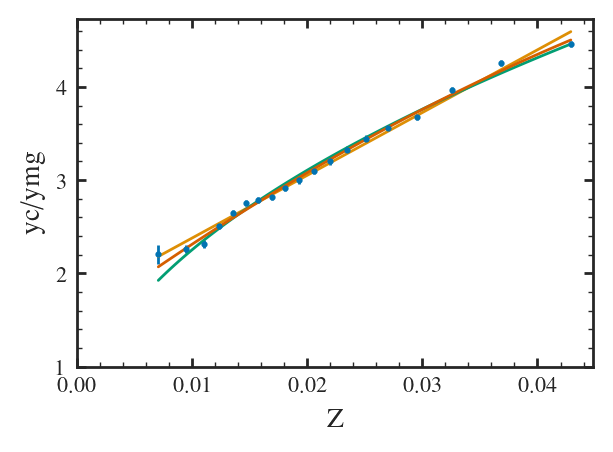

In [66]:
plt.errorbar(gcem.MH_to_Z(xm), y_cc, yerr=yym_err, xerr=x_err*gcem.MH_to_Z(xm)*np.log(10),  fmt=".", capsize=0)
fit_line(gcem.MH_to_Z(xm), y_cc, yym_err)
fit_line(gcem.MH_to_Z(xm), y_cc, yym_err, lin=sqrt)
fit_line(gcem.MH_to_Z(xm), y_cc, yym_err, lin=quad)


plt.xlabel("Z")
plt.ylabel("yc/ymg")
plt.xlim(0)
plt.ylim(1.0)


[ 8.32414276 -0.38910772] [0.348535   0.00971928]


Text(0, 0.5, 'log yc/ymg')

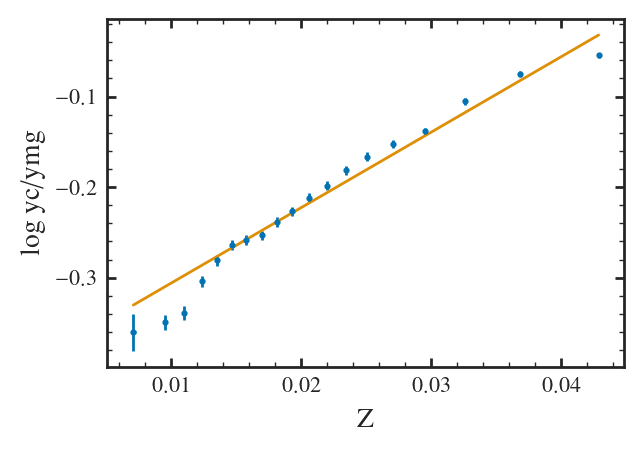

In [28]:
x = gcem.MH_to_Z(xm)
y = gcem.abund_ratio_to_brak(y_cc, "c", "mg")
yerr = yym_err/y_cc / np.log(10)
plt.errorbar(x, y, yerr=yerr, xerr=x_err*gcem.MH_to_Z(xm)*np.log(10),  fmt=".", capsize=0)

fit_line(x, y, yerr)
plt.xlabel("Z")
plt.ylabel("log yc/ymg")

[ 0.47199475 -0.23699064] [0.01066292 0.00237314]


Text(0, 0.5, '[C/Mg]')

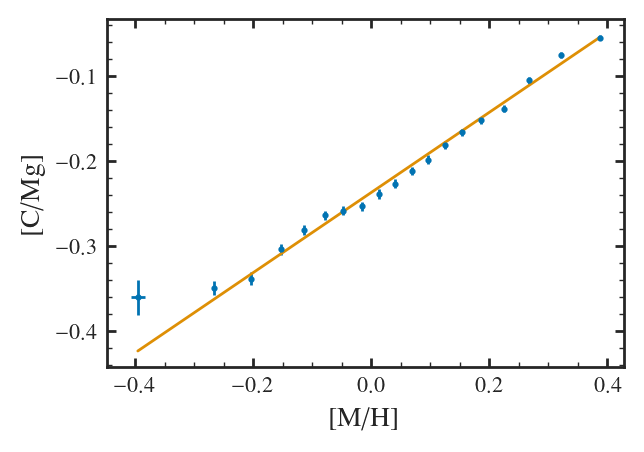

In [29]:
y = gcem.abund_ratio_to_brak(y_cc, "c", "mg")
yerr = yym_err/y_cc / np.log(10)

plt.errorbar((xm), y, yerr=yerr, xerr=x_err,  fmt=".", capsize=0)
fit_line(xm, y, yerr)
plt.xlabel("[M/H]")
plt.ylabel("[C/Mg]")

# LS Fits

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def loglin(x, a, b):
    return a + b*x

In [ ]:
popt, covt = curve_fit(loglin, xm, yym, sigma=yym_err)

In [ ]:
x_pred = np.linspace(-0.6, 0.6, 1000)
y_pred = loglin(x_pred, *popt)
plt.plot(x_pred, y_pred)
plot_obs()

In [ ]:
def lin(x, a, b):
    Z = gcem.MH_to_Z(x)
    return a + b*(Z - Z_SUN)

In [ ]:
popt, covt = curve_fit(lin, xm, yym, sigma=yym_err)

In [ ]:
popt

In [ ]:
x_pred = np.linspace(-0.6, 0.5, 1000)
y_pred = lin(x_pred, *popt)
plt.plot(x_pred, y_pred)
plot_obs()

In [ ]:
def logquad(x, a, b, c):
    return a + b*x + c*x**2

In [ ]:
popt, covt = curve_fit(logquad, xm, yym, sigma=yym_err)

In [ ]:
popt

In [ ]:
x_pred = np.linspace(-0.6, 0.5, 1000)
y_pred = logquad(x_pred, *popt)
plt.plot(x_pred, y_pred)
plot_obs()

In [ ]:
def logexp(x, a, b, c):
    return a + b*np.exp(x*c)

In [ ]:
popt, covt = curve_fit(logexp, xm, yym, sigma=yym_err)

In [ ]:
popt, np.sqrt(np.diag(covt))

In [ ]:
x_pred = np.linspace(-0.6, 0.5, 1000)
y_pred = logexp(x_pred, *popt)
plt.plot(x_pred, y_pred)
plot_obs()
plt.xlabel("[M/H]")
plt.ylabel(r"$y_{\rm C}/y_{\rm Mg}$")

In [ ]:
def logloglin(x, a, b, c):
    return 10**(a + b*x + c*x**2)

In [ ]:
popt, covt = curve_fit(logloglin, xm, yym, sigma=yym_err)
print(popt)
x_pred = np.linspace(-0.6, 0.5, 1000)
y_pred = logloglin(x_pred, *popt)
plt.plot(x_pred, y_pred)
plot_obs()
plt.yscale("log")

In [ ]:
def piecewise(x, a, b, a0):
    return np.maximum(a + b*x, a0)

In [ ]:
y = surp.yield_models.BiLogLin_CC(y0=4, y1=4, zeta=2.5)

In [ ]:
popt, covt = curve_fit(piecewise, xm, yym, sigma=yym_err, p0=(4.5, 0, 4.2))
print(popt)
x_pred = np.linspace(-0.6, 0.5, 1000)
y_pred = piecewise(x_pred, *popt)
plt.plot(x_pred, y_pred)
plt.plot(x_pred, [y(Z) for Z in gcem.MH_to_Z(x_pred)])
plot_obs()
plt.yscale("log")

# MCMC fits

In [ ]:
N =3_000

In [ ]:
import mcmc_utils

In [ ]:
def plot_res(model, samples):
    theta_m = np.median(samples, axis=0)
    y_pred = model(xm, theta_m)

    #plt.scatter(x_obs, y_obs - y_pred, s=2, c=w, ec="none", cmap="Greys", alpha=0.4)
    plt.scatter(xm, yym - y_pred, )
    plt.ylim(-0.3, 0.3)
    plt.xlim(-0.5)
    plt.axhline(0, ls="--")

## Linear Model

In [ ]:
model = mcmc_utils.Linear(beta0=[4, 0.5], beta1=[0, 1], log_sigma=[-15, 0.5])

In [ ]:
mcmc_utils.plot_prior(model, N=1_000)

In [ ]:
samples = mcmc_utils.run_mcmc(model, obs,N=N )

In [ ]:
mcmc_utils.plot_posterior(model, obs, samples, N_lines=500)

# Exponential model

In [ ]:
model  = mcmc_utils.Exponential(beta0=[4, 0.5], beta1=[0.0, 0.4], log_sigma=[-120, 1], alpha=[0, 4])

In [ ]:
mcmc_utils.plot_prior(model, xlims=(-0.5, 0.5))
plt.ylim(3, 5)

In [ ]:
samples = mcmc_utils.run_mcmc(model, obs, N=N)

In [ ]:
mcmc_utils.plot_posterior(model, obs, samples)

## Quadratic model

In [ ]:
model  = mcmc_utils.Quadratic(beta0=[4, 0.5], beta1=[0, 1], log_sigma=[-15, 1])

In [ ]:
mcmc_utils.plot_prior(model)

In [ ]:
samples = mcmc_utils.run_mcmc(model, obs, N=N)

In [ ]:
mcmc_utils.plot_posterior(model, obs, samples)